Phase 1 Project: Safest Aircraft analysis.

In this project I would wish  to answer a question of *which is the safest aicraft to choose*. 

The question is presented to my business stakeholds as they strive to determine the safest aircraft to invest their business in.

For this to be achieved, I have a data to load, do cleaning and inspect all relevant information.

The following are the steps to successfully answer the business stakeholders.

1. Data cleaning.

      1.1 Data extraction

      1.2 Data loading (into dataframes)

      1.3 Data Cleaning

      1.4 Standardizing columns
      

2. Data Analysis:

Aggregate data to understand the frequency and severity of incidents per aircraft make and model.

3. Computations 

This is to calculate the safety scores of different aircrafts and models.

4. Data Visualization.

Here I will use different visualization to present my findings.



1. Data Cleaning.

    1.1 Data extraction 
    

In [2]:
import zipfile
import os
import pandas as pd

zip_file_path = r"C:\Users\Mum PC\Desktop\New folder\archive.zip"

extracted_dir = r"C:\Users\Mum PC\Desktop\New folder\extracted_files"

def extract_zip(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

if os.path.exists(zip_file_path):
   
    if not os.path.exists(extracted_dir):
        os.makedirs(extracted_dir)
    
    extract_zip(zip_file_path, extracted_dir)
    print("Zip file extracted successfully.")
    
    

Zip file extracted successfully.


    1.2 Data loading
    

In [31]:
aviation_data = pd.read_csv('C:\\Users\\Mum PC\\Desktop\\New folder\\extracted_files\\AviationData.csv', encoding='latin1')
us_state_codes= pd.read_csv('C:\\Users\\Mum PC\\Desktop\\New folder\\extracted_files\\AviationData.csv', encoding='latin1')

In [4]:
print(aviation_data.head())
print(us_state_codes.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country Latitude Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States      NaN       NaN          NaN   
1   BRIDGEPORT, CA  United States      NaN       NaN          NaN   
2    Saltville, VA  United States  36.9222  -81.8781          NaN   
3       EUREKA, CA  United States      NaN       NaN          NaN   
4       Canton, OH  United States      NaN       NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...         

    
    1.3 Checking missing values

In [5]:

print("\nMissing values in Aviation Data:")
print(aviation_data.isnull().sum())

print("\nMissing values in US State Data:")
print(us_state_codes.isnull().sum())


Missing values in Aviation Data:
Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Public

1.2 Handling missing values.

The following cells drops and adds relevant information into the columns

In [6]:

aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'], errors='coerce')
aviation_data['Event.Date'].fillna(pd.to_datetime('1948-10-24'), inplace=True)


In [7]:

aviation_data.dropna(subset=['Make', 'Model'], inplace=True)


In [8]:

aviation_data.fillna({'Total.Fatal.Injuries': 0, 'Total.Serious.Injuries': 0, 'Total.Minor.Injuries': 0}, inplace=True)


2. Extracting State Abbreviation from location

In [9]:
# Function to extract state abbreviation from location
def extract_state_abbreviation(location):
    if isinstance(location, str) and ', ' in location:
        return location.split(', ')[-1]
    return None


aviation_data['State_Abbreviation'] = aviation_data['Location'].apply(extract_state_abbreviation)


3. Bivariate Analysis

In [10]:
# Aggregate data by aircraft make and model
aircraft_agg = aviation_data.groupby(['Make', 'Model']).agg({
    'Event.Id': 'count',
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum'
}).reset_index().rename(columns={'Event.Id': 'Total_Incidents'})

# Calculate safety metrics
aircraft_agg['Fatalities_Per_Incident'] = aircraft_agg['Total.Fatal.Injuries'] / aircraft_agg['Total_Incidents']
aircraft_agg['Serious_Injuries_Per_Incident'] = aircraft_agg['Total.Serious.Injuries'] / aircraft_agg['Total_Incidents']
aircraft_agg['Minor_Injuries_Per_Incident'] = aircraft_agg['Total.Minor.Injuries'] / aircraft_agg['Total_Incidents']

# Filter for aircraft with significant data; >5
significant_aircraft = aircraft_agg[aircraft_agg['Total_Incidents'] > 5]

print(significant_aircraft.head())


               Make Model  Total_Incidents  Total.Fatal.Injuries  \
40   AERO COMMANDER   100                8                   2.0   
70   AERO COMMANDER   S2R               14                   3.0   
91          AERONCA  11AC               23                   4.0   
94          AERONCA  15AC                9                   1.0   
100         AERONCA   7AC               63                  12.0   

     Total.Serious.Injuries  Total.Minor.Injuries  Fatalities_Per_Incident  \
40                      2.0                   1.0                 0.250000   
70                      1.0                   3.0                 0.214286   
91                      7.0                   3.0                 0.173913   
94                      0.0                   1.0                 0.111111   
100                    17.0                   6.0                 0.190476   

     Serious_Injuries_Per_Incident  Minor_Injuries_Per_Incident  
40                        0.250000                     0

4. Filter aircraft make for a significant view and visualization

In [11]:

significant_aircraft = aircraft_agg[aircraft_agg['Total_Incidents'] > 5]

print(significant_aircraft.head())

               Make Model  Total_Incidents  Total.Fatal.Injuries  \
40   AERO COMMANDER   100                8                   2.0   
70   AERO COMMANDER   S2R               14                   3.0   
91          AERONCA  11AC               23                   4.0   
94          AERONCA  15AC                9                   1.0   
100         AERONCA   7AC               63                  12.0   

     Total.Serious.Injuries  Total.Minor.Injuries  Fatalities_Per_Incident  \
40                      2.0                   1.0                 0.250000   
70                      1.0                   3.0                 0.214286   
91                      7.0                   3.0                 0.173913   
94                      0.0                   1.0                 0.111111   
100                    17.0                   6.0                 0.190476   

     Serious_Injuries_Per_Incident  Minor_Injuries_Per_Incident  
40                        0.250000                     0

5. Statistical measures.

This finds mean,median and standard devation respectively

In [12]:
# calculate mean
mean_fatal_injuries = aircraft_agg['Total.Fatal.Injuries'].mean()
mean_serious_injuries = aircraft_agg['Total.Serious.Injuries'].mean()
mean_minor_injuries = aircraft_agg['Total.Minor.Injuries'].mean()

print("Mean Fatal Injuries:", mean_fatal_injuries)
print("Mean Serious Injuries:", mean_serious_injuries)
print("Mean Minor Injuries:", mean_minor_injuries)

Mean Fatal Injuries: 2.4887763210170837
Mean Serious Injuries: 1.0600913786253476
Mean Minor Injuries: 1.3634783472387764


In [13]:

# calculate median

median_fatal_injuries = aircraft_agg['Total.Fatal.Injuries'].median()
median_serious_injuries = aircraft_agg['Total.Serious.Injuries'].median()

median_minor_injuries = aircraft_agg['Total.Minor.Injuries'].median()

print("Median Fatal Injuries:", median_fatal_injuries)
print("Median Serious Injuries:", median_serious_injuries)
print("Median Minor Injuries:", median_minor_injuries)

Median Fatal Injuries: 0.0
Median Serious Injuries: 0.0
Median Minor Injuries: 0.0


In [14]:
# calculate standard deviation

std_fatal_injuries = aircraft_agg['Total.Fatal.Injuries'].std()
std_serious_injuries = aircraft_agg['Total.Serious.Injuries'].std()

std_minor_injuries = aircraft_agg['Total.Minor.Injuries'].std()

print("Std Fatal Injuries:", std_fatal_injuries)
print("Std Serious Injuries:", std_serious_injuries)
print("Std Minor Injuries:", std_minor_injuries)

Std Fatal Injuries: 18.708939264844016
Std Serious Injuries: 6.2422309873650725
Std Minor Injuries: 9.565054926010577


In [32]:
# perform summary statistics
data = pd.read_csv('C:\\Users\\Mum PC\\Desktop\\New folder\\extracted_files\\AviationData.csv', encoding='latin1')
summary_stats = data.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000   

6. Conducting Exploratory Data Analysis.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


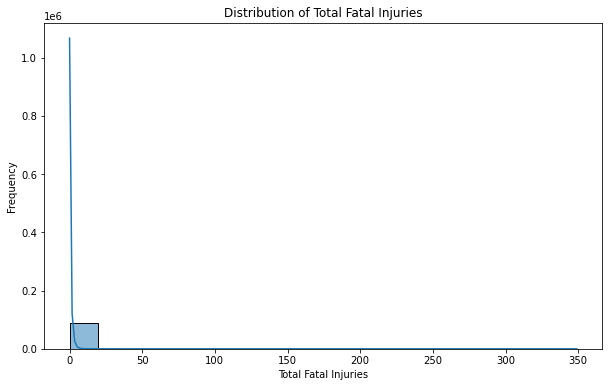

In [17]:
# Distribution of Total Fatal Injuries
plt.figure(figsize=(10, 6))
sns.histplot(aviation_data['Total.Fatal.Injuries'].dropna(), kde=True)
plt.title('Distribution of Total Fatal Injuries')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Frequency')
plt.savefig('/New folder/distribution of Total Fatal Injuries.png')
plt.show()

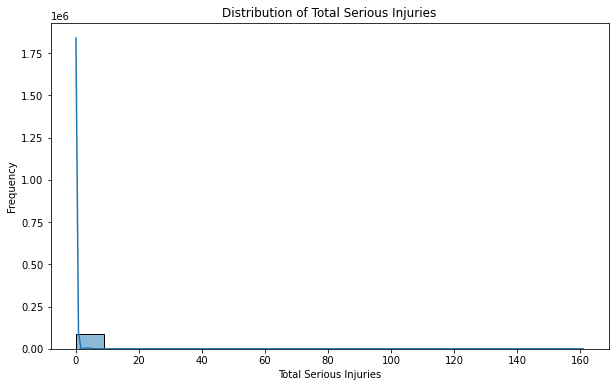

In [18]:
# Distribution of Total Serious Injuries
plt.figure(figsize=(10, 6))
sns.histplot(aviation_data['Total.Serious.Injuries'].dropna(), kde=True)
plt.title('Distribution of Total Serious Injuries')
plt.xlabel('Total Serious Injuries')
plt.ylabel('Frequency')
plt.savefig('/New folder/distribution of Total Serious Injuries.png')
plt.show()

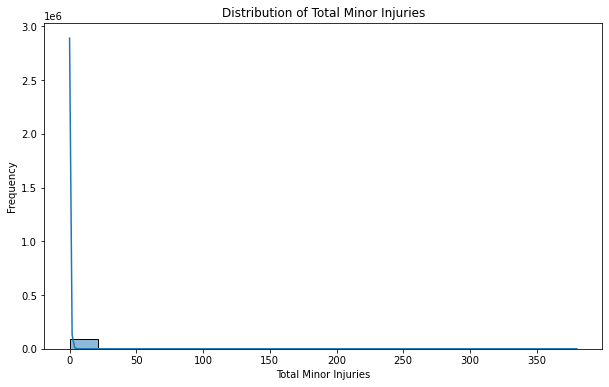

In [19]:
# Distribution of total minor injuries

plt.figure(figsize=(10, 6))
sns.histplot(aviation_data['Total.Minor.Injuries'].dropna(), kde=True)
plt.title('Distribution of Total Minor Injuries')
plt.xlabel('Total Minor Injuries')
plt.ylabel('Frequency')
plt.savefig('/New folder/distribution of Total Minor Injuries.png')
plt.show()

7. Finding correlation analysis

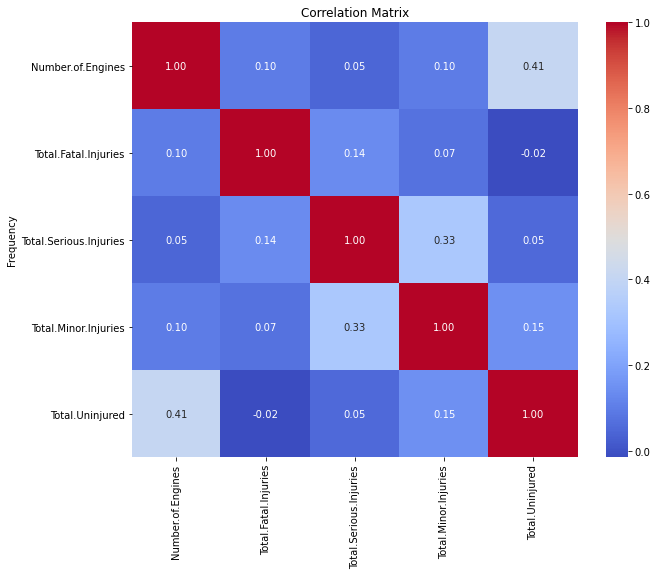

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

aviation_data = pd.read_csv('C:\\Users\\Mum PC\\Desktop\\New folder\\extracted_files\\AviationData.csv', encoding='latin1')

# Calculate the correlation matrix
correlation_matrix = aviation_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.ylabel('Frequency')
plt.savefig('/New folder/ Correlation Matrix.png')

plt.show()


8. Checking for the safest aicraft model

The following cells finds the safest models and defining them

In [21]:
# Adding a column for total injuries
aircraft_agg['Total.Injuries'] = (aircraft_agg['Total.Fatal.Injuries'] +
                                  aircraft_agg['Total.Serious.Injuries'] +
                                  aircraft_agg['Total.Minor.Injuries'])

In [22]:
safest_aircraft = aircraft_agg.nsmallest(10, 'Total.Injuries')

In [23]:
top_aircraft = aircraft_agg.nlargest(10, 'Total.Injuries')

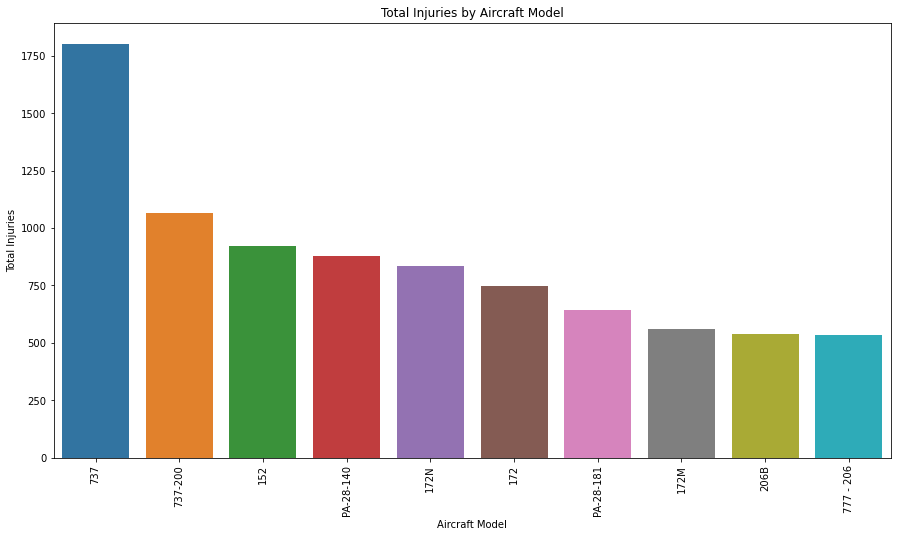

In [24]:
plt.figure(figsize=(15, 8))
sns.barplot(data=top_aircraft, x='Model', y='Total.Injuries')
plt.xticks(rotation=90)
plt.title('Total Injuries by Aircraft Model')
plt.xlabel('Aircraft Model')
plt.ylabel('Total Injuries')
plt.show()

8.1 Summary statistics of safest aicraft model

In [25]:
print("\nSummary Statistics of Top Aircraft Models")
print(top_aircraft.describe(include='all'))


Summary Statistics of Top Aircraft Models
          Make Model  Total_Incidents  Total.Fatal.Injuries  \
count       10    10        10.000000             10.000000   
unique       5    10              NaN                   NaN   
top     Cessna   172              NaN                   NaN   
freq         4     1              NaN                   NaN   
mean       NaN   NaN       728.500000            478.300000   
std        NaN   NaN       637.506122            370.607324   
min        NaN   NaN         3.000000            201.000000   
25%        NaN   NaN       424.500000            244.250000   
50%        NaN   NaN       571.500000            354.000000   
75%        NaN   NaN       950.000000            491.750000   
max        NaN   NaN      2168.000000           1348.000000   

        Total.Serious.Injuries  Total.Minor.Injuries  Fatalities_Per_Incident  \
count                10.000000             10.000000                10.000000   
unique                     NaN        

8.2 Visualizing on the safest models

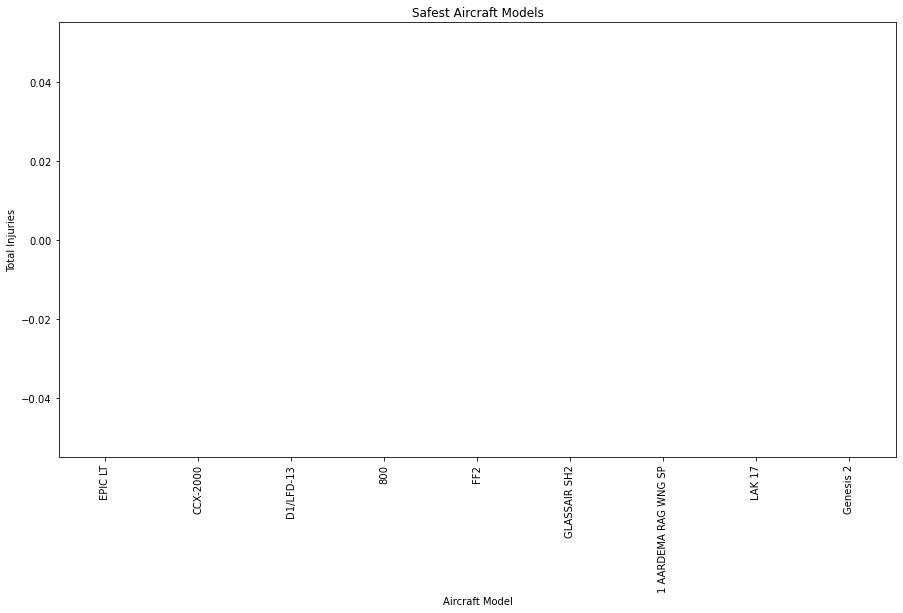

In [26]:
# Plotting the safest aircraft models
plt.figure(figsize=(15, 8))
sns.barplot(data=safest_aircraft, x='Model', y='Total.Injuries')
plt.xticks(rotation=90)
plt.title('Safest Aircraft Models')
plt.xlabel('Aircraft Model')
plt.ylabel('Total Injuries')
plt.show()

9. Checking for ethics


9.1 Data Representation: Check distribution of incidents across states; this identifies any imbalances

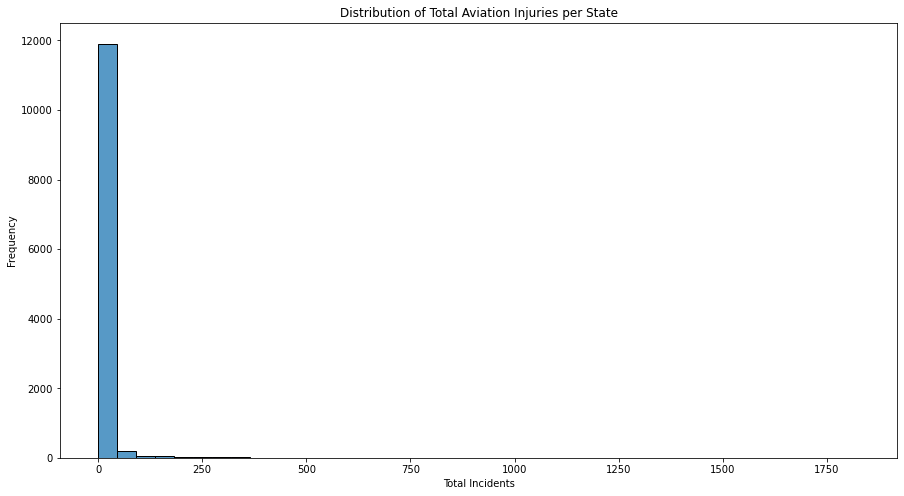

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.histplot(aircraft_agg['Total.Injuries'], bins=40)
plt.title('Distribution of Total Aviation Injuries per State')
plt.xlabel('Total Incidents')
plt.ylabel('Frequency')
plt.savefig('/New folder/Distribution of Total Aviation Injuries per State.png')
plt.show()

9.2 Missing Data: Analyzing missing data identifies any patterns in missing data

Text(0.5, -43.0, 'Column')

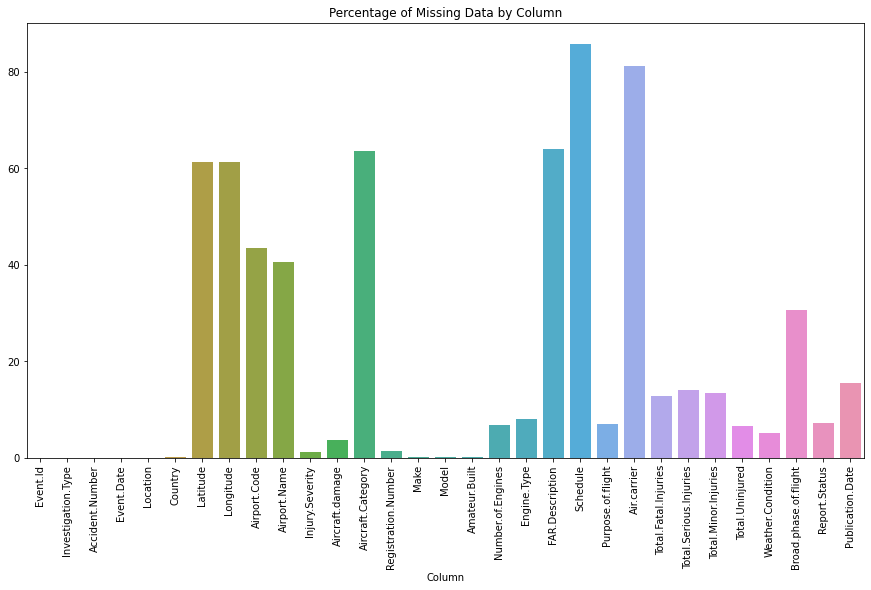

In [29]:
missing_data = aviation_data.isnull().mean() * 100

plt.figure(figsize=(15, 8))
sns.barplot(x=missing_data.index, y=missing_data)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Data by Column')
plt.savefig('/New folder/Percentage of Missing Data by Column.png')
plt.xlabel('Column')

Summary.


Data Cleaning: I loaded and cleaned the data, handling missing values and extracting relevant information.


Data Analysis:I  aggregated data to compute incident frequency and severity for different aircraft makes and models.


Computations: I calculated safety scores based on fatalities, serious injuries, and minor injuries.


Visualization: I created visualizations to present the analysis, focusing on incident counts and safety scores.


Data Ethics: I created visualizations to view on the ethical models of the data.

Conclusion

From my analysis, I identified the aircraft models with the highest and lowest total injuries. The safest aircraft models are those with the least total injuries. The least total injuries have their plots empty because there are no incidents but the aircraft models are displayed.

Recommendation

Based on the data, I would like to recommend to my Business Stakeholders, that the safest aicrafts to chose are those that show fewest total injuries that is fatal,serious and minor injuries.


                                                                 

                                                                                                             Gladwell Chepkorir